In [4]:
# Statistical analysis libraries
import pandas as pd
import numpy as np
import scipy.stats as stats # This is for q-q plot
import matplotlib.pyplot as plt
import math
from scipy.stats import chisquare

# Random number generation library
import random

# Helper functions
def load_data(filename):
  return pd.read_table(filename).to_numpy().flatten()

def draw_histogram(data, k, title):
  fig, p = plt.subplots(figsize=(8,6))
  fig.suptitle(title)
  p.set_xlabel("Bin")
  p.set_ylabel("Frequency")
  p.hist(data, bins = k, rwidth=0.5)

def draw_qq_plot(data, distribution):
  fig, p = plt.subplots(figsize=(8,6))
  stats.probplot(data, dist=distribution, plot=p)
  p.title.set_text("Q-Q Plot")

def get_bin_endpoints(data, probablity):
  l = 1 / np.mean(data)
  print("Lambda is: ", l)
  endpoints = np.array([])

  culmulative = 0

  while culmulative < 1:
    inverse = -math.log(1 - culmulative) / l
    endpoints = np.append(endpoints, [inverse])
    culmulative += probablity
  
  endpoints = np.append(endpoints, 500.0)

  return endpoints

def calculate_chi_square(observed_frequencies,
                         bins: int,
                         n_samples: int,
                         estimated_parameters: int):
  

  p = 1 / len(observed_frequencies)
  expected_frequencies = [n_samples * p for x in range(len(observed_frequencies))]
  degrees_of_freedom = len(observed_frequencies) - estimated_parameters - 1



  return chisquare(observed_frequencies, expected_frequencies, degrees_of_freedom)


# Inspection time for Inspector 1 (Component 1)

Lambda is:  0.09653840404260218
Chi Squared value:  Power_divergenceResult(statistic=16.384615384615383, pvalue=5.1703188452148204e-05)


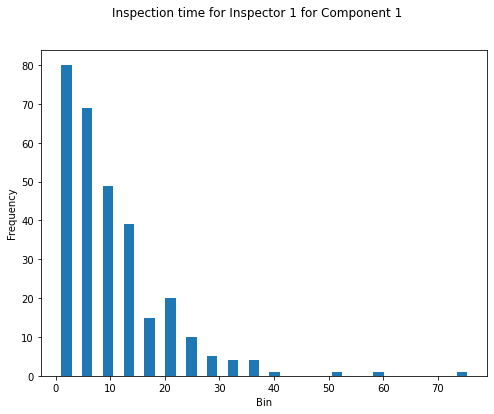

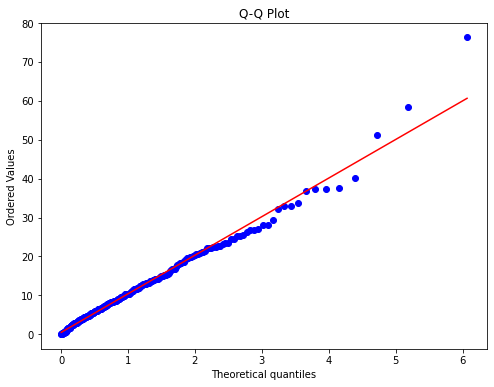

In [5]:
data = load_data("servinsp1.dat")
k = 20
draw_histogram(data, k, "Inspection time for Inspector 1 for Component 1")
draw_qq_plot(data, "expon")

# Chi-squared test
bins = get_bin_endpoints(data, 1/k)
(h,_) = np.histogram(data, bins)

chi_squared = calculate_chi_square(h, bins, data.size, 1)
print("Chi Squared value: ", chi_squared)

# Service time for Inspector 2 (Component 2)

Lambda is:  0.06435877671830938
Chi Squared value:  Power_divergenceResult(statistic=16.384615384615383, pvalue=5.1703188452148204e-05)


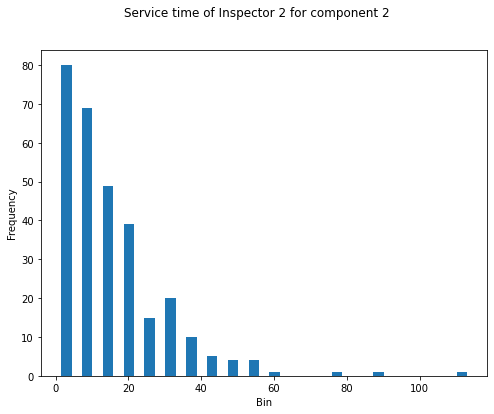

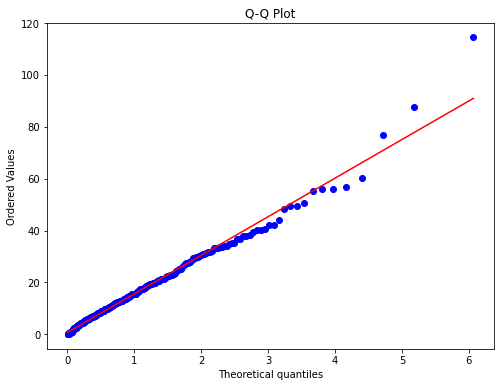

In [6]:
data = load_data("servinsp22.dat")
k = 20
draw_histogram(data, k, "Service time of Inspector 2 for component 2")
draw_qq_plot(data, "expon")

# Chi-squared test
bins = get_bin_endpoints(data, 1/k)
(h,_) = np.histogram(data, bins)

chi_squared = calculate_chi_square(h, bins, data.size, 1)
print("Chi Squared value: ", chi_squared)

# Service time for Inspector 2 (Component 3)

Lambda is:  0.04911527618144004
Chi Squared value:  Power_divergenceResult(statistic=14.110367892976587, pvalue=0.0001723909641053979)


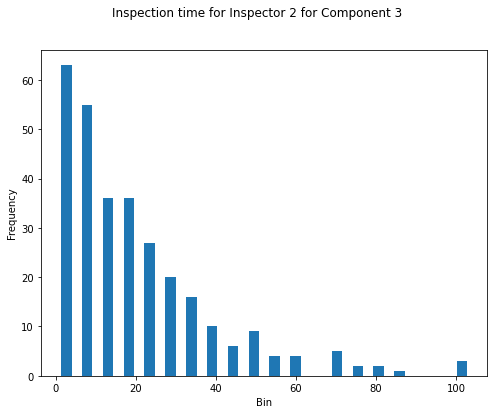

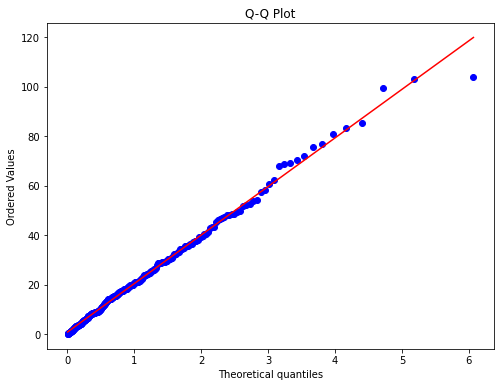

In [7]:
data = load_data("servinsp23.dat")
k = 20
draw_histogram(data, k, "Inspection time for Inspector 2 for Component 3")
draw_qq_plot(data, "expon")

# Chi-squared test
bins = get_bin_endpoints(data, 1/k)
(h,_) = np.histogram(data, bins)

chi_squared = calculate_chi_square(h, bins, data.size, 1)
print("Chi Squared value: ", chi_squared)

#Service time for Workstation 1

Lambda is:  0.21718277740575173
Chi Squared value:  Power_divergenceResult(statistic=24.799999999999997, pvalue=6.359746939367406e-07)


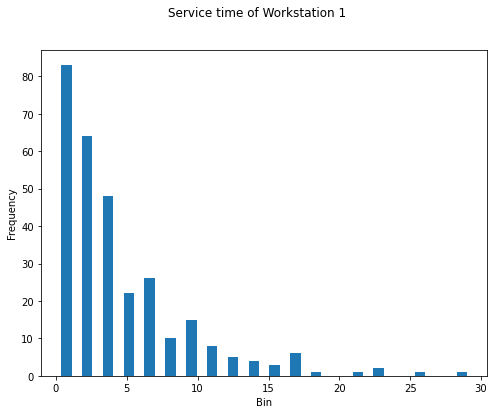

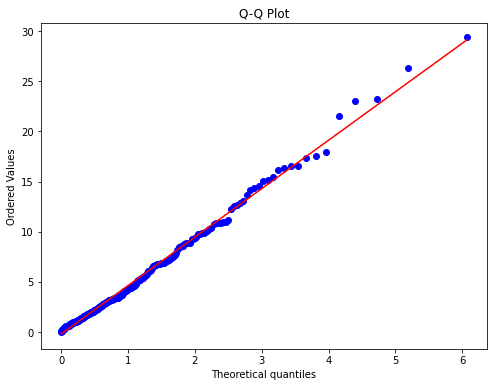

In [8]:
data = load_data("ws1.dat")
k = 20
draw_histogram(data, k, "Service time of Workstation 1")
draw_qq_plot(data, "expon")

# Chi-squared test
bins = get_bin_endpoints(data, 1/k)
(h,_) = np.histogram(data, bins)

chi_squared = calculate_chi_square(h, bins, data.size, 1)
print("Chi Squared value: ", chi_squared)

#Service time for Workstation 2

Lambda is:  0.09021371296711998
Chi Squared value:  Power_divergenceResult(statistic=20.665551839464886, pvalue=5.469114833856795e-06)


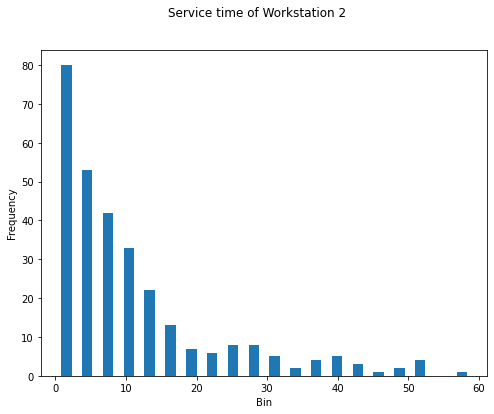

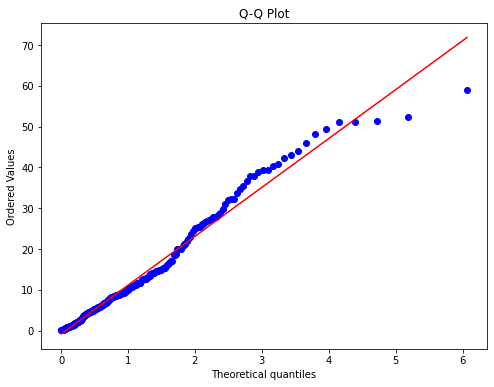

In [9]:
data = load_data("ws2.dat")
k = 20
draw_histogram(data, k, "Service time of Workstation 2")
draw_qq_plot(data, "expon")

# Chi-squared test
bins = get_bin_endpoints(data, 1/k)
(h,_) = np.histogram(data, bins)

chi_squared = calculate_chi_square(h, bins, data.size, 1)
print("Chi Squared value: ", chi_squared)

#Service time for Workstation 3

Lambda is:  0.11434839009704699
Chi Squared value:  Power_divergenceResult(statistic=25.347826086956516, pvalue=4.786915580295762e-07)


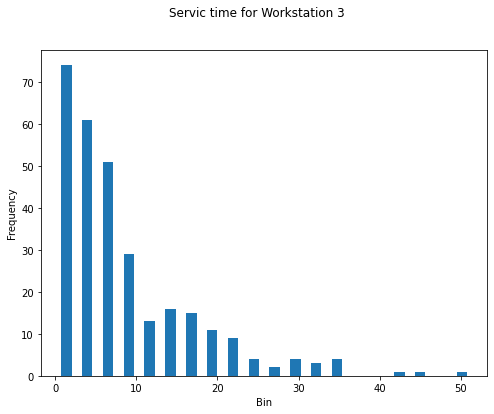

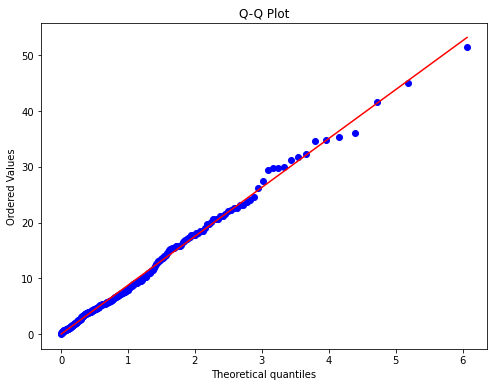

In [10]:
data = load_data("ws3.dat")
k = 20
draw_histogram(data, k, "Servic time for Workstation 3")
draw_qq_plot(data, "expon")

# Chi-squared test
bins = get_bin_endpoints(data, 1/k)
(h,_) = np.histogram(data, bins)

chi_squared = calculate_chi_square(h, bins, data.size, 1)
print("Chi Squared value: ", chi_squared)

# Random Number Generator test

Chi Squared value:  Power_divergenceResult(statistic=17.866666666666667, pvalue=nan)
Z_o is:  -1.6810222265158756


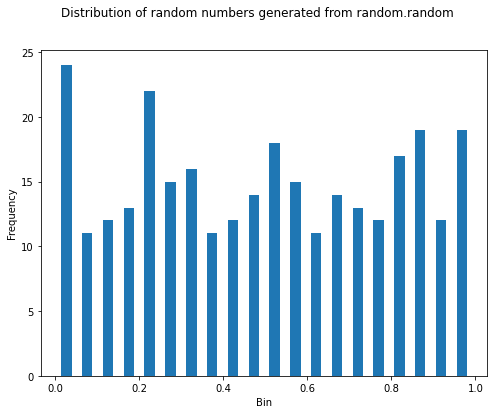

In [11]:
N = 300 # Generate 300 random numbers

random.seed(1) # Sets the seed so the test can be repeated
rn = [random.random() for n in range(0, N)] # Generate the random numbers
bins = [n/100 for n in range(0, 105, 5)] # Since we have 20 bins therefore each bin width is 0.05

draw_histogram(rn, 20, "Distribution of random numbers generated from random.random")

# Chi squared test
(h, _) = np.histogram(rn, bins)
chi_squared = calculate_chi_square(h, bins, len(rn), 0)
print("Chi Squared value: ", chi_squared)

# Independence test
i = 0
m = 4
# N = 300
M = math.floor(N / m - 1)

sum = 0
for k in range(0, M):
  sum += rn[i + k*m] * rn[i + (k + 1)*m]

p = (sum / (M + 1)) - 0.25
sigma = (13*M + 7)**(1/2) / (12 * (M + 1))

Z_o = p/sigma

print("Z_o is: ", Z_o)

# Random Variate Generator

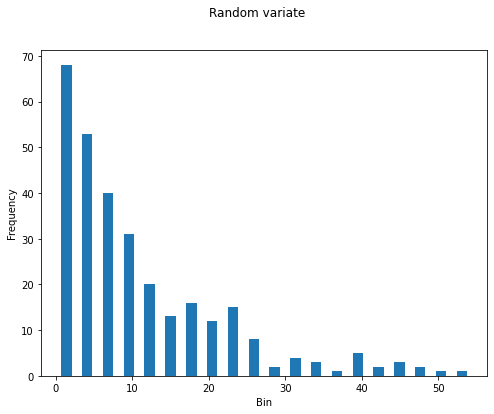

In [12]:
'''
The function accepts the lambda and a random numer. The function 
generates the variate using the Inverse-Transform Technique.
'''
def exponential_variate(lambd, rn):
  return -math.log(1 - rn) / lambd

# This is to confirm that the variates generated is exponetial
values = [exponential_variate(0.09, i) for i in rn]

draw_histogram(values, 20, "Random variate")